# Import modules

In [1]:
import geopandas as gpd
import rasterio
import numpy as np
import os
import matplotlib.pyplot as plt
import tifffile as tfl
%matplotlib inline

In [12]:
#insert your binary mask directories
input_raster ="C:/Users/Toby/Desktop/rooftop extraction/to convert geojson/binary_masks/binary_masks/christchurch_217.tif"

In [13]:
from rasterio.features import shapes
with rasterio.open(input_raster) as src:
    data = src.read()
    data = np.squeeze(data)
    mask = data!= 0
    results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) 
        in enumerate(
            shapes(data, mask=mask, transform=src.transform)))

In [14]:
geoms1 = list(results)

In [15]:
geoms1

[{'properties': {'raster_val': 1.0},
  'geometry': {'type': 'Polygon',
   'coordinates': [[(1561380.399999999, 5177220.000000001),
     (1561380.399999999, 5177219.925000001),
     (1561380.5499999989, 5177219.925000001),
     (1561380.5499999989, 5177219.850000001),
     (1561380.624999999, 5177219.850000001),
     (1561380.624999999, 5177220.000000001),
     (1561380.399999999, 5177220.000000001)]]}},
 {'properties': {'raster_val': 1.0},
  'geometry': {'type': 'Polygon',
   'coordinates': [[(1561241.0499999989, 5177220.000000001),
     (1561241.0499999989, 5177219.925000001),
     (1561241.199999999, 5177219.925000001),
     (1561241.199999999, 5177219.850000001),
     (1561241.274999999, 5177219.850000001),
     (1561241.274999999, 5177219.775000001),
     (1561241.4249999989, 5177219.775000001),
     (1561241.4249999989, 5177219.700000001),
     (1561241.574999999, 5177219.700000001),
     (1561241.574999999, 5177219.625000001),
     (1561241.724999999, 5177219.625000001),
     (15

In [16]:
gpd_data =gpd.GeoDataFrame.from_features(geoms1) # converting json format to Geopandas dataframe

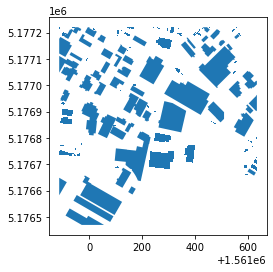

In [17]:
gpd_data.plot()

In [19]:
gpd_data.to_file("C:/Users/Toby/Desktop/rooftop extraction/geotiff2geojson1.geojson",driver='GeoJSON') #insert output directories filename with geojson extension